### Movie Assignment Dataset

**Overview:** We will be loading the movies dataset into the dataframe and generate analytics around the data for better understanding and helpful in decision making for movies production industry

#### Task 1: Import the data set into a Pandas DataFrame.

In [1]:
# Import the required modules
import pandas as pd
import numpy as np

In [2]:
# Load data from CSV to df
df = pd.read_csv('Movie Assignment Data.csv')
df.head(3)

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia


#### Task 2: Generate descriptive statistics for the budget of all the movies.**

In [3]:
# Generate descriptive stats for the budget column in df
df['budget'].describe()

count    1.000000e+02
mean     7.838400e+07
std      7.445295e+07
min      3.000000e+06
25%      1.575000e+07
50%      4.225000e+07
75%      1.500000e+08
max      2.600000e+08
Name: budget, dtype: float64

#### Task 3: Find out how many of the top-rated movies produced in the United States have a PG-13 rating.

In [4]:
# Define the country and rating you want to check
country = 'USA'
rating = 'PG-13'

# Count the number of movies produced in the specified country with the specified rating
count = ((df['Country'] == country) & (df['content_rating'] == rating)).sum()

# Print the result
print(f"Number of movies produced in {country} with a {rating} rating: {count}")

Number of movies produced in USA with a PG-13 rating: 35


#### Task 4: Find out whether any of the top-rated movies produced in 2014 were not produced in the United States.

In [5]:
# Check if there are any top-rated movies produced in 2014 that were not produced in the USA
result = ((df['title_year'] == 2014) & (df['Country'] != 'USA')).any()

# Print the result as a boolean value
print(f"Were there any of the top-rated movies produced in 2014 that were not produced in the USA: {result}")

Were there any of the top-rated movies produced in 2014 that were not produced in the USA: True


#### Find the percentage of the top-rated movies that are in 
- #### 1 genre only 
- #### 2 genre only
- #### 3 genre only

In [6]:
# Task 5(a): Calculate the percentage of top-rated movies that belong to a single genre.

# Get the total number of top-rated movies in the DataFrame
total_movies = len(df)

# Count the number of movies with a single genre by checking if genre_1 is not null while genre_2 and genre_3 are null
single_genre_movies = ((df['genre_1'].notna()) & (df['genre_2'].isna()) & (df['genre_3'].isna())).sum()

# Calculate the percentage of movies with a single genre
percentage_single_genre = (single_genre_movies / total_movies) * 100

# Print the percentage with two decimal places
print(f"The percentage of top-rated movies with a single genre: {percentage_single_genre:.2f}%")


The percentage of top-rated movies with a single genre: 3.00%


In [7]:
# Task 5(b): Calculate the percentage of top-rated movies that belong to exactly two genres.

# Get the total number of top-rated movies in the DataFrame
total_movies = len(df)

# Count the number of movies with exactly two genres by checking different combinations of genre columns
two_genre_movies = df.loc[
    ((df['genre_1'].notna() & df['genre_2'].notna() & df['genre_3'].isna()) |
     (df['genre_1'].notna() & df['genre_2'].isna() & df['genre_3'].notna()) |
     (df['genre_1'].isna() & df['genre_2'].notna() & df['genre_3'].notna())),
    'Title'
].count()

# Calculate the percentage of movies with exactly two genres
percentage_two_genres = (two_genre_movies / total_movies) * 100

# Print the percentage with two decimal places
print(f"The percentage of top-rated movies with exactly two genres: {percentage_two_genres:.2f}%")

The percentage of top-rated movies with exactly two genres: 23.00%


In [8]:
# Task 5(c): Calculate the percentage of top-rated movies that belong to exactly three genres.

# Count the number of movies with exactly three genres by checking if all genre columns are not empty (notna)
movies_with_three_genres = (df['genre_1'].notna() & df['genre_2'].notna() & df['genre_3'].notna()).sum()

# Get the total number of top-rated movies in the DataFrame
total_movies = len(df)

# Calculate the percentage of movies with exactly three genres
percentage_three_genres = (movies_with_three_genres / total_movies) * 100

# Print the percentage with two decimal places
print(f"The percentage of top-rated movies with exactly three genres: {percentage_three_genres:.2f}%")

The percentage of top-rated movies with exactly three genres: 74.00%


#### Task 6: Convert the budget and gross values from “dollars” to “dollars in millions” for all top-rated movies. Round the converted values down to 3 decimal places. For example, a value of 192,345,273 should be converted to 192.345.

In [9]:
# Convert the 'budget' column from a larger unit (e.g., millions) to a smaller unit (e.g., millions of dollars)
df['budget'] = round(df['budget'] * 0.000001, 3)

# Convert the 'Gross' column from a larger unit (e.g., millions) to a smaller unit (e.g., millions of dollars)
df['Gross'] = round(df['Gross'] * 0.000001, 3)

#### Task 7: List all details for the top 10 movies with the highest profit, sorted from highest to lowest. Hint: Profit is not a column in the DataFrame. You will need to calculate it.

In [10]:
# Calculate the profit for each movie and add it as a new column 'Profit' in the DataFrame
df['Profit'] = df['Gross'] - df['budget']

# Sort the DataFrame by 'Profit' in descending order to find the top 10 most profitable movies
top_profitable_movies = df.sort_values(by='Profit', ascending=False).head(10)

# Display the top 10 movies with the highest profit
print("Top 10 Most Profitable Movies:")
top_profitable_movies.head(10)

Top 10 Most Profitable Movies:


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,Profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662
11,The Avengers,2012,220.0,623.280,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,...,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.280
47,Deadpool,2016,58.0,363.024,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024
32,The Hunger Games: Catching Fire,2013,130.0,424.646,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.646
12,Toy Story 3,2010,200.0,414.984,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984
8,The Dark Knight Rises,2012,250.0,448.131,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,...,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.131
45,The Lego Movie,2014,60.0,257.756,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756
1,Zootopia,2016,150.0,341.268,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268
41,Despicable Me,2010,69.0,251.502,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.502
18,Inside Out,2015,175.0,356.454,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454


#### Task 8: Generate a list of all the actors, in alphabetical order by the first name, that have starred in a top-rated movie. If an actor has starred in multiple movies, their name should appear only once on the list. Assume that all actors’ names are in the format <first_name> <last_name>.

In [11]:
# Combine actor names from three different columns into a single list
all_actors = list(set(list(df['actor_1_name']) + list(df['actor_2_name']) + list(df['actor_3_name'])))

# Remove any occurrences of "0" (assuming it represents missing or unknown data)
all_actors.remove("0")

# Sort the list of actors alphabetically by the first name
all_actors.sort()

# Print the list of actors
print("List of all actors in top-rated movies (sorted by first name):")
print(all_actors)

List of all actors in top-rated movies (sorted by first name):
['Abraham Benrubi', 'Adam Brown', 'Aidan Quinn', 'Aidan Turner', 'Albert Brooks', 'Albert Finney', 'Aldis Hodge', 'Alexandra Maria Lara', 'Alfred Enoch', 'Alison Brie', 'Allen Leech', 'America Ferrera', 'Amiée Conn', 'Amy Adams', 'Amy Poehler', 'Amy Ryan', 'Amy Warren', 'Andrew Garfield', 'Anna Kendrick', 'Anne Hathaway', 'Ariane Labed', 'Athina Rachel Tsangari', 'Ato Essandoh', 'Audrey Fleurot', 'Basher Savage', 'Ben Foster', 'Benedict Cumberbatch', 'Benedict Wong', 'Bernardo Saracino', 'Beth Grant', 'Bill Murray', 'Billy Crudup', 'Bob Balaban', 'Brad Garrett', 'Brad Pitt', 'Bradley Cooper', 'Brian Johnson', "Brian d'Arcy James", 'Bruce Dern', 'Bruce Green', 'Bruce Greenwood', 'Bruce Willis', 'Bryce Dallas Howard', 'BÃ©rÃ©nice Bejo', 'Casey Affleck', 'Charlie Talbert', 'Charlize Theron', 'Chelan Simmons', 'Chiwetel Ejiofor', 'ChloÃ« Grace Moretz', 'Chris Evans', 'Chris Hemsworth', 'Chris Mulkey', 'Chris Pine', 'Christian B

#### Task 9: The movie studio wants to determine who it should approach to act in its next movie production. Find the top 3 actors who appeared in the most top-rated movies.

In [12]:
# Combine the actor names from three different columns into a single Series
all_actors = pd.Series(list(df['actor_1_name']) + list(df['actor_2_name']) + list(df['actor_3_name']))

# Count the occurrences of each actor's name, sort in descending order, and take the top 3
top_actors = all_actors.value_counts(sort=True, ascending=False).head(3)

# Print the top 3 actors who appeared in the most top-rated movies
print("Top 3 actors who appeared in the most top-rated movies:")
print(top_actors)

Top 3 actors who appeared in the most top-rated movies:
Tom Hardy            5
Leonardo DiCaprio    5
Jennifer Lawrence    4
Name: count, dtype: int64


#### Task 10: Create a data visualization that shows each country and the number of top-rated movies produced in it. Find the country that produced the most top-rated movies.

The country that produced the most top-rated movies is: USA (81 movies)


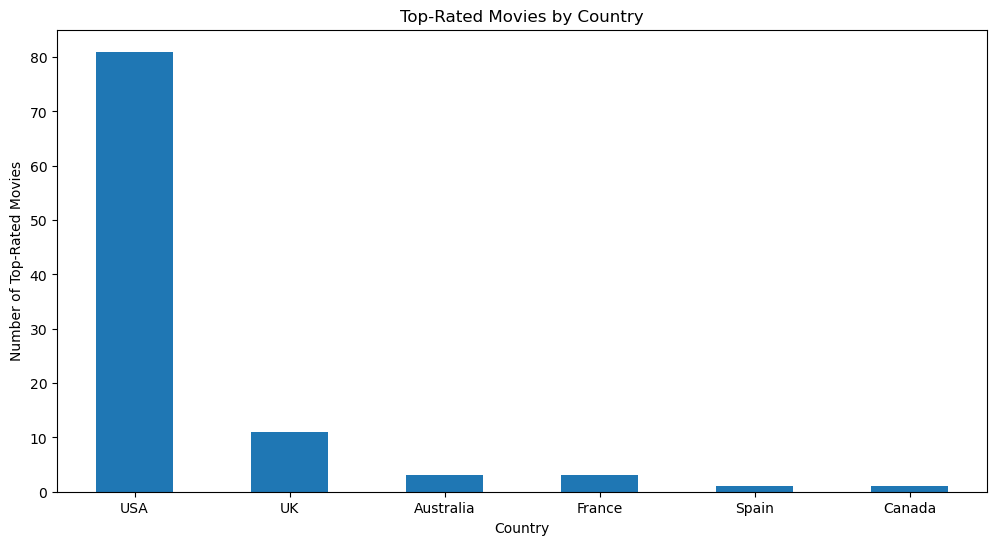

In [13]:
# Import the required module
import matplotlib.pyplot as plt

# First, calculate the number of top-rated movies produced in each country
top_rated_counts = df['Country'].value_counts()

# Find the country that produced the most top-rated movies
highest_top_rated_country = top_rated_counts.idxmax()
highest_top_rated_count = top_rated_counts.max()

print(f"The country that produced the most top-rated movies is: {highest_top_rated_country} ({highest_top_rated_count} movies)")

# Create a bar plot for visualization
plt.figure(figsize=(12, 6))
top_rated_counts.plot(kind='bar', rot=0)
plt.title('Top-Rated Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Top-Rated Movies')
plt.show()